In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem

import pathlib

import matplotlib.pyplot as plt
import seaborn as sns

# Read molecules

In [3]:
mols = []
file_nums = []
path = pathlib.Path("2014SQER967.qdb/compounds/")
for direc in path.iterdir():
    if direc.is_dir():
        mol = Chem.MolFromMolFile(f"{str(direc)}/mdl-molfile")
        mols.append(mol)
        file_nums.append(str(direc).split("/")[-1])

In [4]:
smiles = [Chem.MolToSmiles(x) for x in mols]

In [5]:
db = pd.DataFrame({"db_idx":file_nums, "smiles":smiles, "mols":mols})

In [6]:
db

,db_idx,smiles,mols
0,162,CNc1cccc(C)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bac0>
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510ba60>
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510b760>
3,540,Clc1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bb80>
4,74,Nc1cccc([N+](=O)[O-])c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bbe0>
...,...,...,...
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b400>
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b3a0>
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b4c0>
1005,387,COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b460>


In [7]:
db["db_idx"] = db["db_idx"].astype(int)

# Read logBCF values

In [8]:
vals = pd.read_csv("2014SQER967.qdb/properties/logBCF/values", sep="\t")
vals

,Compound Id,Experimental logarithmic BCF
0,1,-0.222
1,2,2.731
2,3,0.052
3,4,-0.169
4,5,1.071
...,...,...
1002,1032,0.204
1003,1033,1.505
1004,1034,1.732
1005,1035,2.477


# Merge compounds with their logBCF values

In [9]:
db = db.merge(vals, left_on="db_idx", right_on="Compound Id").drop(columns="Compound Id")
db

,db_idx,smiles,mols,Experimental logarithmic BCF
0,162,CNc1cccc(C)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bac0>,0.849
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510ba60>,3.140
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510b760>,1.176
3,540,Clc1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bb80>,2.500
4,74,Nc1cccc([N+](=O)[O-])c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bbe0>,0.522
...,...,...,...,...
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b400>,3.176
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b3a0>,-0.222
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b4c0>,1.568
1005,387,COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b460>,3.362


# Read BCF class data

In [10]:
vals = pd.read_csv("2014SQER967.qdb/properties/BCF_class/values", sep="\t")
vals

,Compound Id,Experimental BCF class
0,1,nB
1,2,nB
2,3,nB
3,4,nB
4,5,nB
...,...,...
1002,1032,nB
1003,1033,nB
1004,1034,nB
1005,1035,nB


# Merge BCF class data with compounds and logBCF values

In [11]:
db = db.merge(vals, left_on="db_idx", right_on="Compound Id").drop(columns="Compound Id")
db

,db_idx,smiles,mols,Experimental logarithmic BCF,Experimental BCF class
0,162,CNc1cccc(C)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bac0>,0.849,nB
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510ba60>,3.140,B
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510b760>,1.176,nB
3,540,Clc1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bb80>,2.500,nB
4,74,Nc1cccc([N+](=O)[O-])c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bbe0>,0.522,nB
...,...,...,...,...,...
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b400>,3.176,B
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b3a0>,-0.222,nB
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b4c0>,1.568,nB
1005,387,COP(=S)(OC)Oc1ccc(Sc2ccc(OP(=S)(OC)OC)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b460>,3.362,B


In [12]:
db["Experimental BCF class"].value_counts()

nB    798
B     209
Name: Experimental BCF class, dtype: int64

# Compounds structure analysis

In [13]:
def checkCONF(mol):
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() not in [6, 7, 8, 9]:
            return False
    return True

def checkCONFCl(mol):
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() not in [6, 7, 8, 9, 17]:
            return False
    return True

def checkCONFClBr(mol):
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() not in [6, 7, 8, 9, 17, 35]:
            return False
    return True

def checkCONFClBrI(mol):
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() not in [6, 7, 8, 9, 17, 35, 53]:
            return False
    return True

def checkCONFClS(mol):
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() not in [6, 7, 8, 9, 17, 16]:
            return False
    return True

In [14]:
atomic_nbs = set()
def check_atomic_nbs(mol):
    for atom in mol.GetAtoms():
        atomic_nbs.add(atom.GetAtomicNum())
db["mols"].apply(check_atomic_nbs)

0       None
1       None
2       None
3       None
4       None
        ... 
1002    None
1003    None
1004    None
1005    None
1006    None
Name: mols, Length: 1007, dtype: object

In [15]:
atomic_nbs

{6, 7, 8, 9, 15, 16, 17, 35, 53}

In [16]:
db["num_atoms"] = db["mols"].apply(lambda x: x.GetNumAtoms())

In [17]:
elements={
    6:["C", 0],
    7:["N", 0],
    8:["O", 0],
    9:["F", 0],
    15:["P", 0],
    16:["S", 0],
    17:["Cl", 0],
    35:["Br", 0],
    53:["I", 0],
}

In [18]:
def count_molecules_w_elements(mol):
    elem = set()
    for atom in mol.GetAtoms():
        elem.add(atom.GetAtomicNum())
    for element in elem:
        elements[element][1]+=1

In [19]:
db["mols"].apply(count_molecules_w_elements)
elements

{6: ['C', 1007],
 7: ['N', 531],
 8: ['O', 694],
 9: ['F', 84],
 15: ['P', 93],
 16: ['S', 207],
 17: ['Cl', 377],
 35: ['Br', 48],
 53: ['I', 3]}

In [20]:
elements_df = pd.DataFrame(elements.values(), columns=["element", "count"])
elements_df

,element,count
0,C,1007
1,N,531
2,O,694
3,F,84
4,P,93
5,S,207
6,Cl,377
7,Br,48
8,I,3


In [21]:
from matplotlib import rcParams
rcParams["font.size"] = 30

/home/bartek/programming/python_projects/jpy/jpy_venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


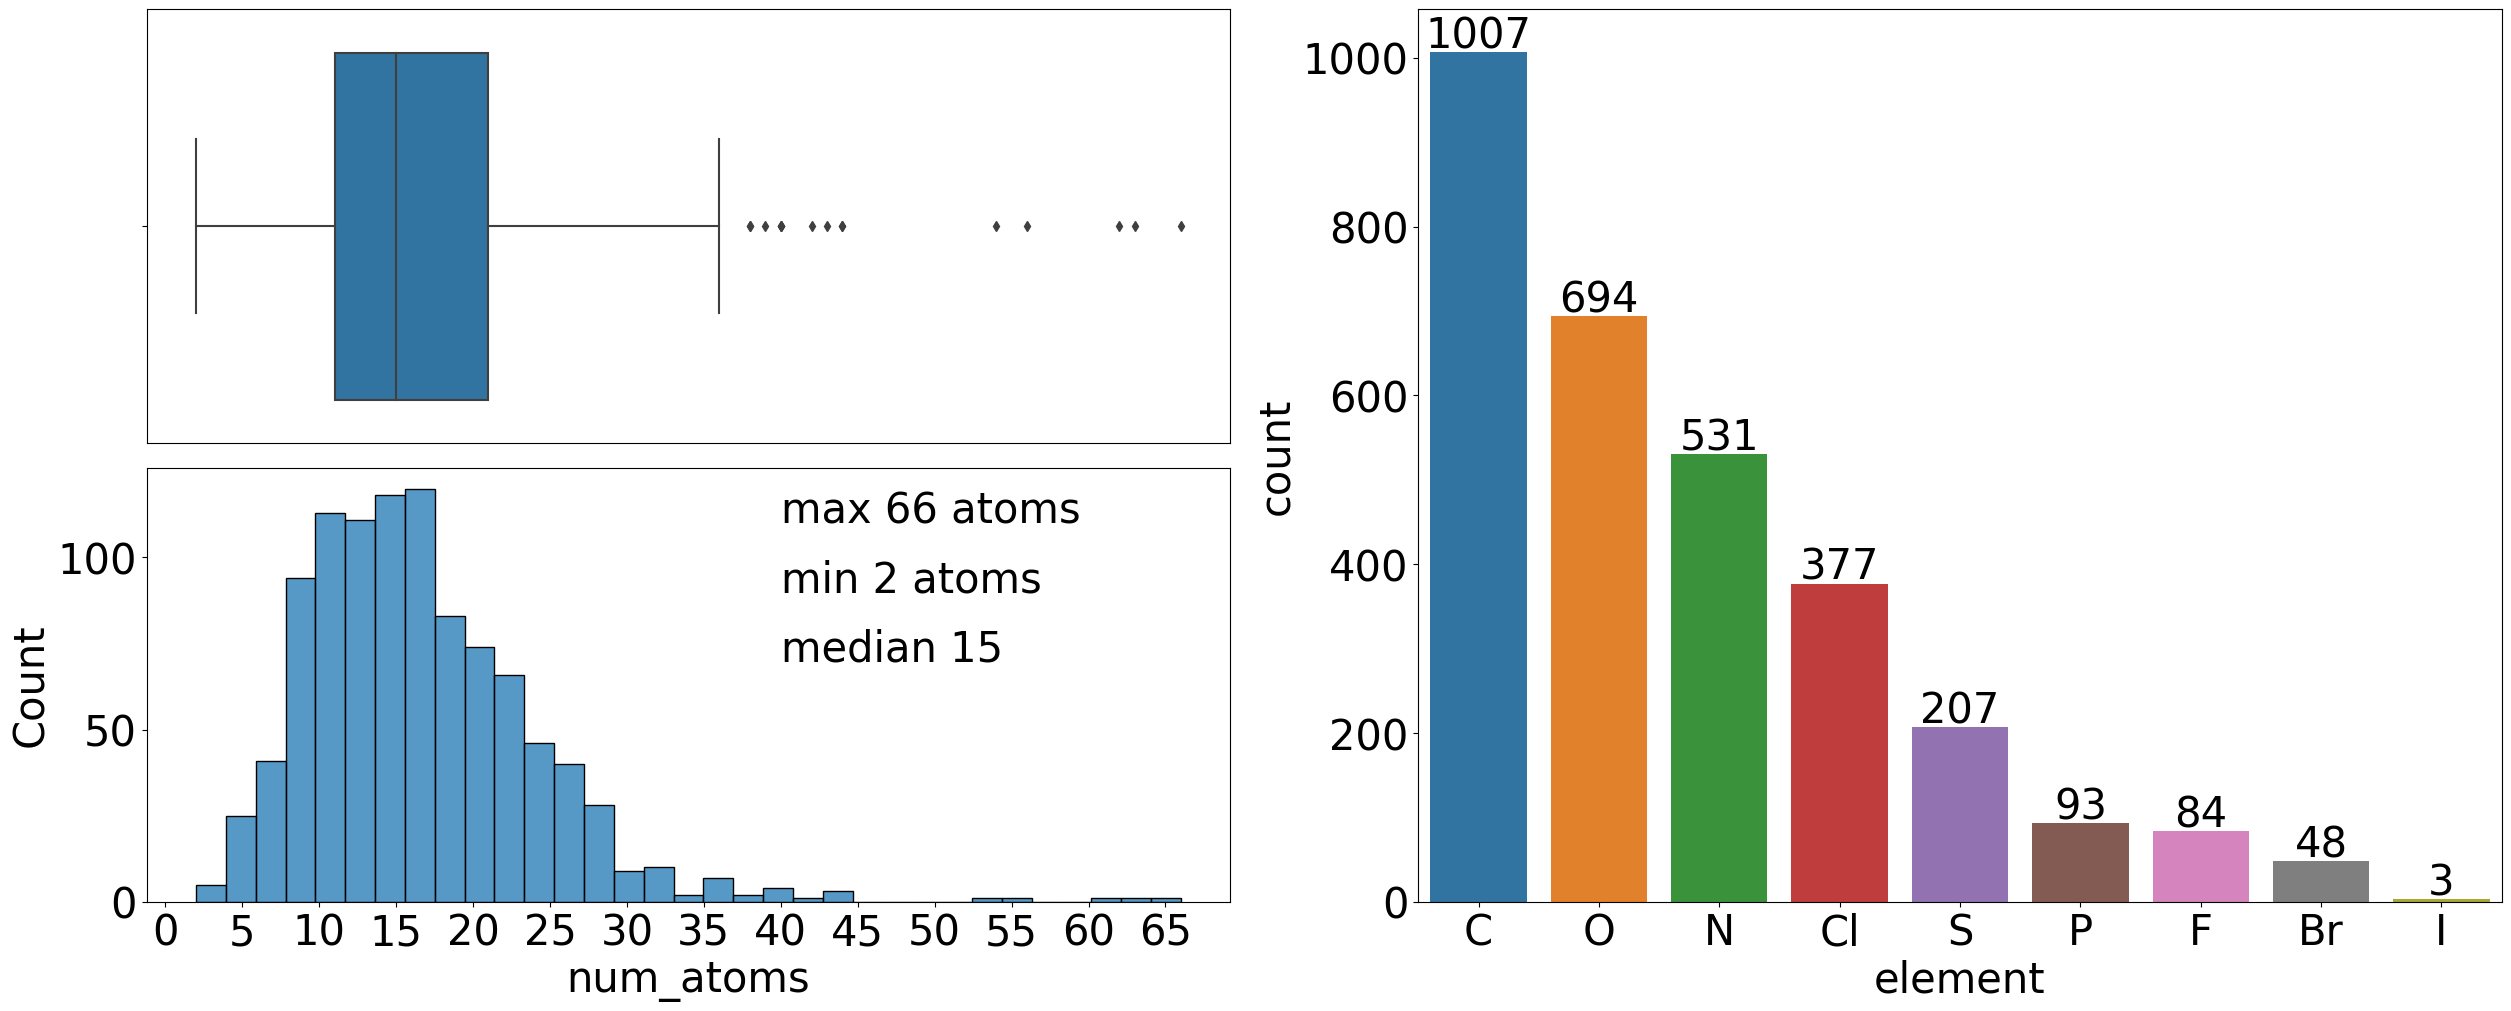

In [22]:
fig = plt.figure(constrained_layout=True, figsize=(25,10))
plots = fig.subplot_mosaic("""
AB
CB
""")
sns.histplot(db["num_atoms"], ax=plots["C"])
sns.boxplot(db["num_atoms"], ax=plots["A"])
max_at = db["num_atoms"].max()
min_at = db["num_atoms"].min()
median_at = int(db["num_atoms"].median())
plots["C"].text(40, 110, f"max {max_at} atoms")
plots["C"].text(40, 90, f"min {min_at} atoms")
plots["C"].text(40, 70, f"median {median_at}")
plots["A"].set_xlabel("")
plots["A"].set_xticks([])
plots["C"].set_xticks(range(0, db["num_atoms"].max(), 5))

sns.barplot(x="element", y="count", data=elements_df.sort_values(by="count", ascending=False), ax=plots["B"])
for i, row in elements_df.sort_values(by="count", ascending=False).reset_index(drop=True).iterrows():
    plots["B"].text(i, row[1]+5, f"{row[1]}", fontsize=30, ha="center")

In [23]:
db["CONF"] = db["mols"].apply(checkCONF)
db["CONFCl"] = db["mols"].apply(checkCONFCl)
db["CONFClBr"] = db["mols"].apply(checkCONFClBr)
db["CONFClBrI"] = db["mols"].apply(checkCONFClBrI)
db["CONFClS"] = db["mols"].apply(checkCONFClS)

In [24]:
db[db["CONF"]]["Experimental BCF class"].value_counts(), db[db["CONF"]].shape

(nB    328
 B      76
 Name: Experimental BCF class, dtype: int64,
 (404, 11))

In [25]:
db[db["CONFCl"]]["Experimental BCF class"].value_counts(), db[db["CONFCl"]].shape

(nB    550
 B     176
 Name: Experimental BCF class, dtype: int64,
 (726, 11))

In [26]:
db[db["CONFClBr"]]["Experimental BCF class"].value_counts(), db[db["CONFClBr"]].shape

(nB    582
 B     186
 Name: Experimental BCF class, dtype: int64,
 (768, 11))

In [27]:
db[db["CONFClBrI"]]["Experimental BCF class"].value_counts(), db[db["CONFClBrI"]].shape

(nB    584
 B     186
 Name: Experimental BCF class, dtype: int64,
 (770, 11))

In [28]:
db[db["CONFClS"]]["Experimental BCF class"].value_counts(), db[db["CONFClS"]].shape

(nB    681
 B     187
 Name: Experimental BCF class, dtype: int64,
 (868, 11))

In [29]:
cols = ["CONF", "CONFCl", "CONFClBr", "CONFClBrI", "CONFClS"]
db_sums = db[cols].sum()

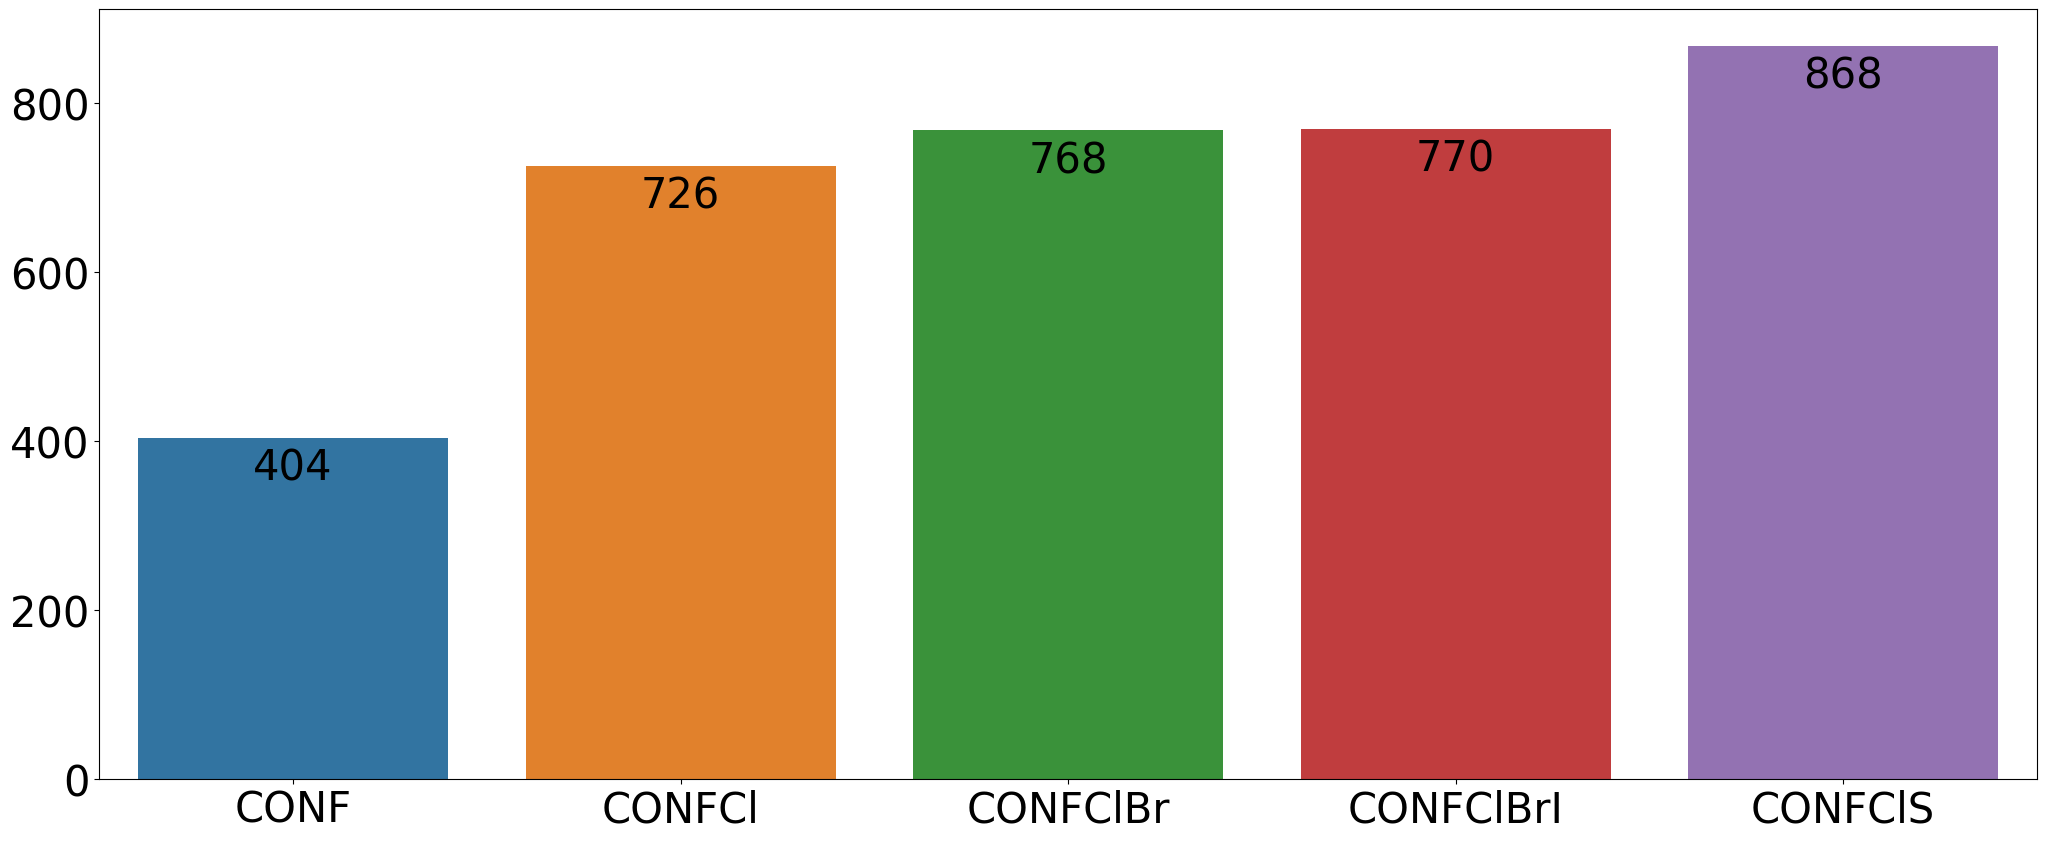

In [30]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x=db_sums.index, y=db_sums.values)
for i, num in enumerate(db_sums.values):
    ax.text(i, num-50, str(num), fontsize=30, ha="center")

In [31]:
db_confs = db[db["CONFClS"]].copy()

In [32]:
elements3={
    6:["C", 0],
    7:["N", 0],
    8:["O", 0],
    9:["F", 0],
    17:["Cl", 0],
    16:["S",0]
}

In [33]:
def count_molecules_w_elementsS(mol):
    elem = set()
    for atom in mol.GetAtoms():
        elem.add(atom.GetAtomicNum())
    for element in elem:
        elements3[element][1]+=1

In [34]:
db_confs["mols"].apply(count_molecules_w_elementsS)
elements3

{6: ['C', 868],
 7: ['N', 477],
 8: ['O', 574],
 9: ['F', 81],
 17: ['Cl', 350],
 16: ['S', 142]}

In [35]:
elements_df3 = pd.DataFrame(elements3.values(), columns=["element", "count"])
elements_df3

,element,count
0,C,868
1,N,477
2,O,574
3,F,81
4,Cl,350
5,S,142


/home/bartek/programming/python_projects/jpy/jpy_venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'number of molecules')]

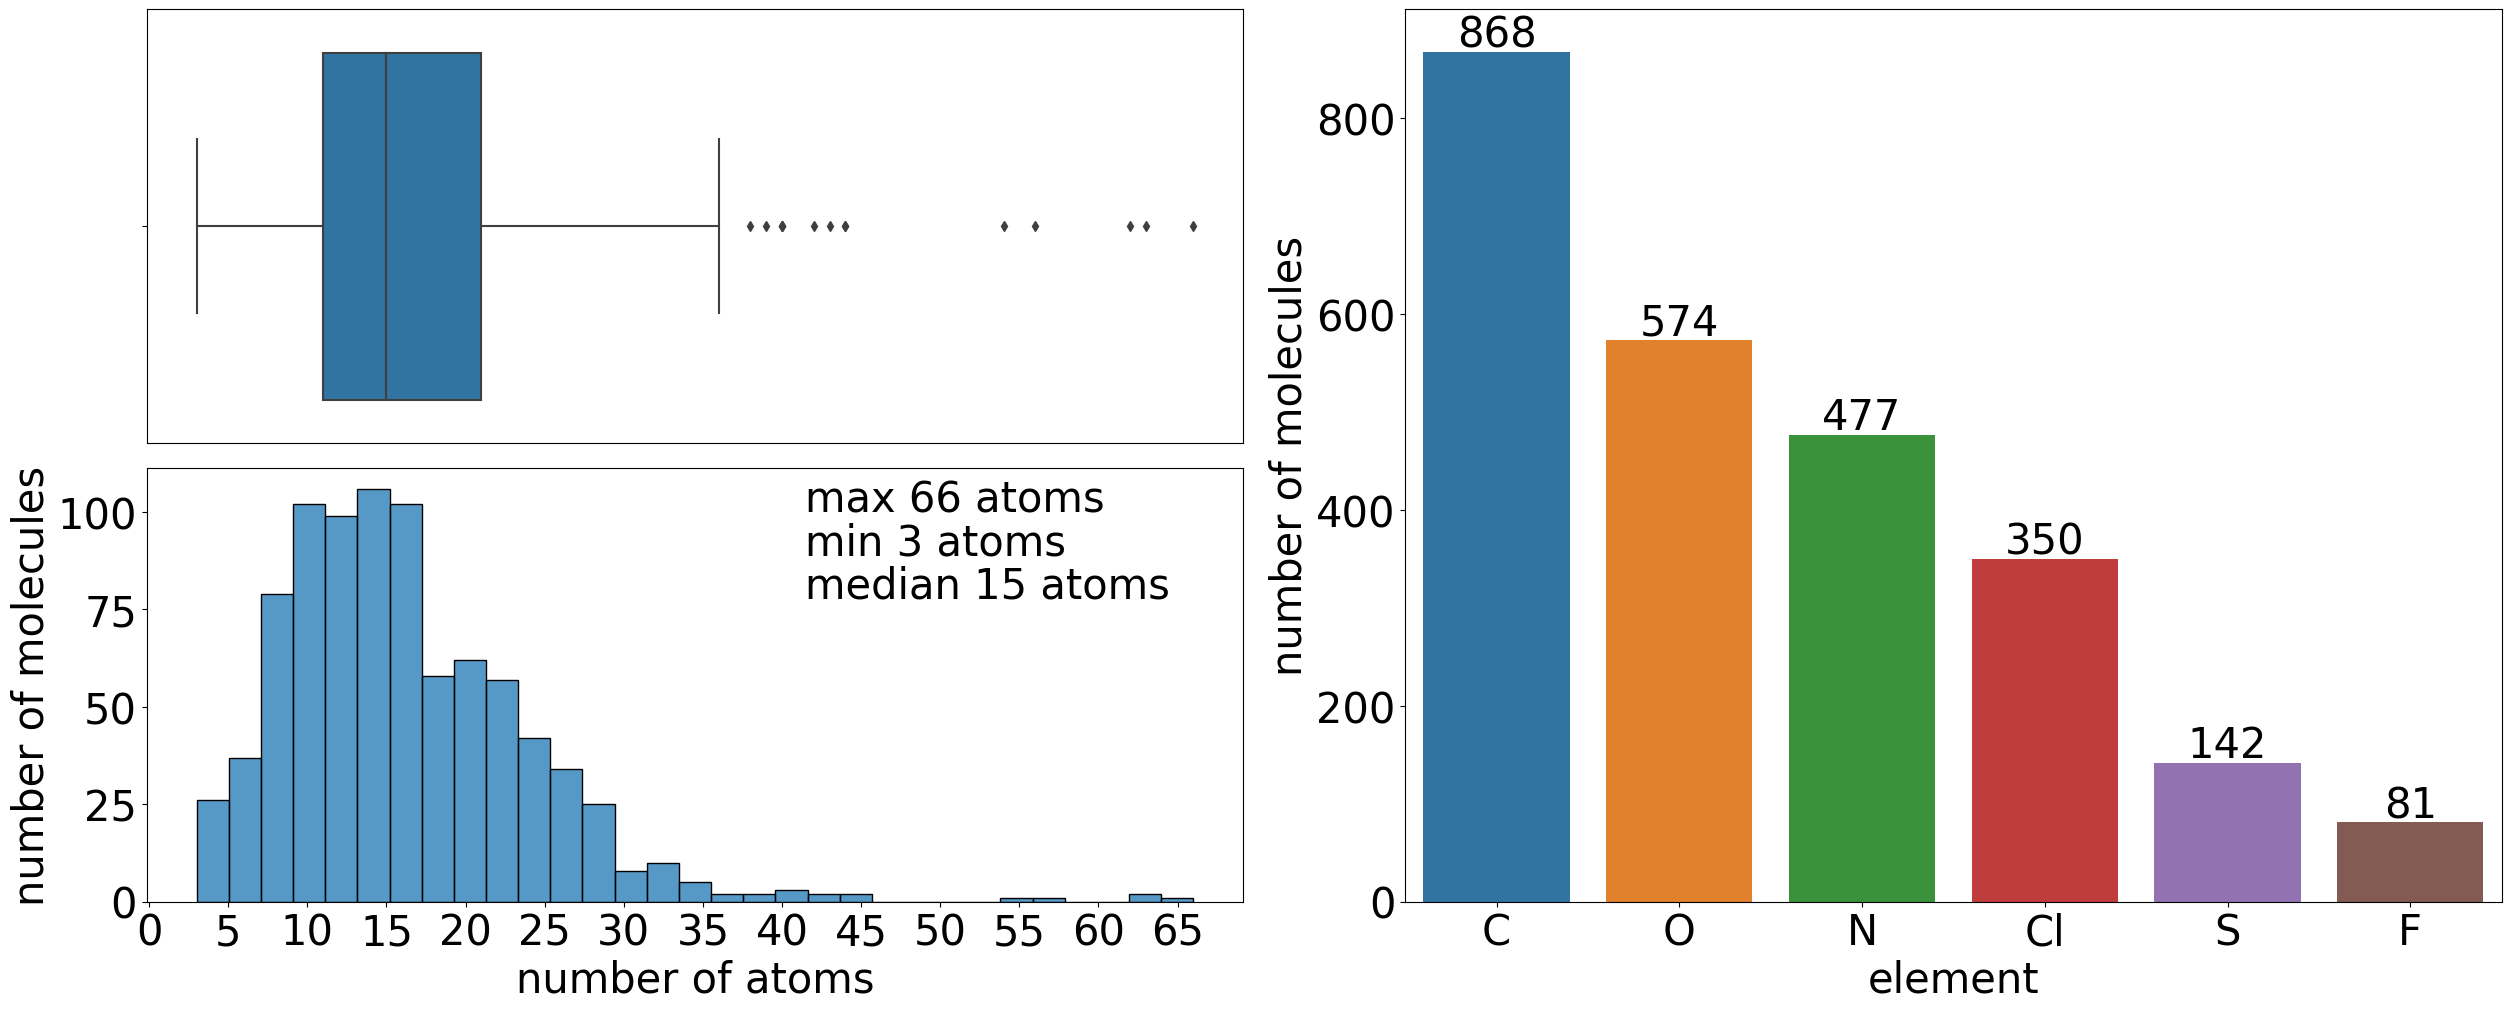

In [36]:
fig = plt.figure(constrained_layout=True, figsize=(25,10))
plots = fig.subplot_mosaic("""
AB
CB
""")
sns.histplot(db_confs["num_atoms"], ax=plots["C"])
sns.boxplot(db_confs["num_atoms"], ax=plots["A"])
max_at = db_confs["num_atoms"].max()
min_at = db_confs["num_atoms"].min()
mean_at = int(db_confs["num_atoms"].median())
plots["C"].text(0.6, 0.9, f"max {max_at} atoms", transform=plots["C"].transAxes)
plots["C"].text(0.6, 0.8, f"min {min_at} atoms", transform=plots["C"].transAxes)
plots["C"].text(0.6, 0.7, f"median {mean_at} atoms", transform=plots["C"].transAxes)
plots["A"].set_xlabel("")
plots["A"].set_xticks([])
plots["C"].set_xticks(range(0, db_confs["num_atoms"].max(), 5))
plots["C"].set(xlabel="number of atoms", ylabel="number of molecules")


sns.barplot(x="element", y="count", data=elements_df3.sort_values(by="count", ascending=False), ax=plots["B"])
for i, row in elements_df3.sort_values(by="count", ascending=False).reset_index(drop=True).iterrows():
    plots["B"].text(i, row[1]+5, f"{row[1]}", fontsize=30, ha="center")
plots["B"].set(ylabel="number of molecules")

In [37]:
fig.savefig("bioaccumulation_database_composition.pdf")

## Save db of chosen molecules

In [39]:
db_confs.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClS", "CONFClBrI", "num_atoms"],
              inplace=True)
db_confs.drop(columns=["mols"]).to_csv("merged_bioacc_data.csv")

# Read QM9+Cl database

In [41]:
qm9 = pd.read_csv("qm_ext_plus.csv")
qm9["mol"] = qm9["smiles"].apply(Chem.MolFromSmiles)

# Find substructures from QM9+Cl that are present in BCF database compounds
## Warning! This is time consuming step

In [42]:
def find_pattern_indexes(molecule: Chem.Mol, patterns_dataframe: pd.DataFrame): #-> List[int]:
    ret = []
    for index, row in patterns_dataframe.iterrows():
        if len(list(molecule.GetSubstructMatch(row["mol"])))>0:
            ret.append(index)
    if len(ret) == 0:
        return np.NaN
    return ret

In [45]:
for num in range(2, 10):
    db_confs[f"FQD_{num}"] = db_confs["mols"].apply(find_pattern_indexes, patterns_dataframe=qm9[qm9["num_atoms"]==num])

In [47]:
db_confs

,db_idx,smiles,mols,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9
0,162,CNc1cccc(C)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bac0>,0.849,nB,[6],NaN,NaN,NaN,[213],"[929, 939]","[4340, 5388]",[32107]
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510ba60>,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]"
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510b760>,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245]
3,540,Clc1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bb80>,2.500,nB,NaN,NaN,NaN,NaN,[213],[134076],[135440],NaN
4,74,Nc1cccc([N+](=O)[O-])c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a510bbe0>,0.522,nB,NaN,NaN,NaN,NaN,[213],[939],[4360],[131914]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,920,CC1=C(C)S(=O)(=O)CCS1(=O)=O,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b2e0>,0.633,nB,[6],NaN,NaN,NaN,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135085, 135403, 135404]",[145103]
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b400>,3.176,B,[6],NaN,NaN,NaN,[213],"[929, 134076]","[134377, 134381, 135440]",[137743]
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b3a0>,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322..."
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7fd2a517b4c0>,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]"


# Save the database to .parquet file

In [48]:
db_confs.drop(columns="mols").to_parquet("db_conf.parquet")

In [3]:
db_conf = pd.read_parquet("db_conf.parquet")
db_conf["mol"] = db_conf["smiles"].apply(Chem.MolFromSmiles)
# db_conf.drop(columns=["CONF", "CONFCl", "CONFClBr", "CONFClBrI"], inplace=True)
db_conf

,db_idx,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol
0,162,CNc1cccc(C)c1,0.849,nB,[6],None,None,None,[213],"[929, 939]","[4340, 5388]",[32107],<rdkit.Chem.rdchem.Mol object at 0x7fb6c4778d60>
1,480,CC(COc1ccc(Oc2ccccc2)cc1)Oc1ccccn1,3.140,B,"[6, 7]","[12, 13, 14]","[21, 39, 40, 41]","[81, 84, 134, 136]","[213, 214, 277, 395, 548]","[948, 953, 1578]","[4590, 5397, 5402]","[31844, 33001, 33006]",<rdkit.Chem.rdchem.Mol object at 0x7fb6c4778e80>
2,375,CCCCCCCC/C=C\CCCCCCCCCCCCC,1.176,nB,[6],[12],[38],[132],[542],[2719],[14787],[123245],<rdkit.Chem.rdchem.Mol object at 0x7fb6c4778ee0>
3,540,Clc1ccccc1Cl,2.500,nB,None,None,None,None,[213],[134076],[135440],None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c4778f40>
4,74,Nc1cccc([N+](=O)[O-])c1,0.522,nB,None,None,None,None,[213],[939],[4360],[131914],<rdkit.Chem.rdchem.Mol object at 0x7fb6c4778fa0>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,920,CC1=C(C)S(=O)(=O)CCS1(=O)=O,0.633,nB,[6],None,None,None,"[133896, 133900]","[134043, 134044, 134066, 134068]","[135085, 135403, 135404]",[145103],<rdkit.Chem.rdchem.Mol object at 0x7fb6c47938e0>
1002,599,FC(F)(F)c1ccc(Cl)c(Cl)c1,3.176,B,[6],None,None,None,[213],"[929, 134076]","[134377, 134381, 135440]",[137743],<rdkit.Chem.rdchem.Mol object at 0x7fb6c4793940>
1003,457,CN(C)[C@@H]1C(=O)C(C(=N)O)=C(O)[C@@]2(O)C(=O)C...,-0.222,nB,"[5, 6, 7]","[10, 12, 13]","[17, 20, 21, 34, 37, 38, 39, 41]","[54, 67, 68, 70, 71, 80, 81, 82, 83, 127, 131,...","[213, 224, 226, 228, 254, 258, 259, 260, 271, ...","[929, 948, 1092, 1094, 1099, 1104, 1119, 1129,...","[4341, 4957, 4959, 5378, 5407, 5809, 5841, 584...","[26263, 26273, 28867, 32083, 32170, 32193, 322...",<rdkit.Chem.rdchem.Mol object at 0x7fb6c47939a0>
1004,347,CC(C)N(C(=O)CCl)c1ccccc1,1.568,nB,"[5, 6]","[10, 11, 12]","[18, 35]","[69, 73, 128]","[213, 255, 262, 288, 386]","[939, 1121, 1626, 1677]","[5388, 7443]","[25503, 26283, 32992]",<rdkit.Chem.rdchem.Mol object at 0x7fb6c4793a00>


In [4]:
db_conf[db_conf[[f"FQD_{i}" for i in range(2,10)]].isna().all(axis=1)]

,db_idx,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol
67,774,CN1CSC(=S)N(C)C1,0.491,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c477a5c0>
198,512,S=C=S,1.282,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c4784e80>
390,122,ClC(Cl)=C(Cl)Cl,1.838,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c4788d00>
434,25,ClC=C(Cl)Cl,1.114,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c4789ae0>
499,830,FC(F)(Cl)Cl,0.877,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c478aec0>
511,729,CN=C(S)S,-1.523,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c478b280>
553,513,C=C(Cl)Cl,0.880,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c478bfa0>
665,126,CN(C)C(=S)SSC(=S)N(C)C,0.597,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c478cb20>
710,507,ClC(Cl)Cl,0.799,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c478da20>
728,508,CS(C)=O,0.102,nB,None,None,None,None,None,None,None,None,<rdkit.Chem.rdchem.Mol object at 0x7fb6c478dfc0>


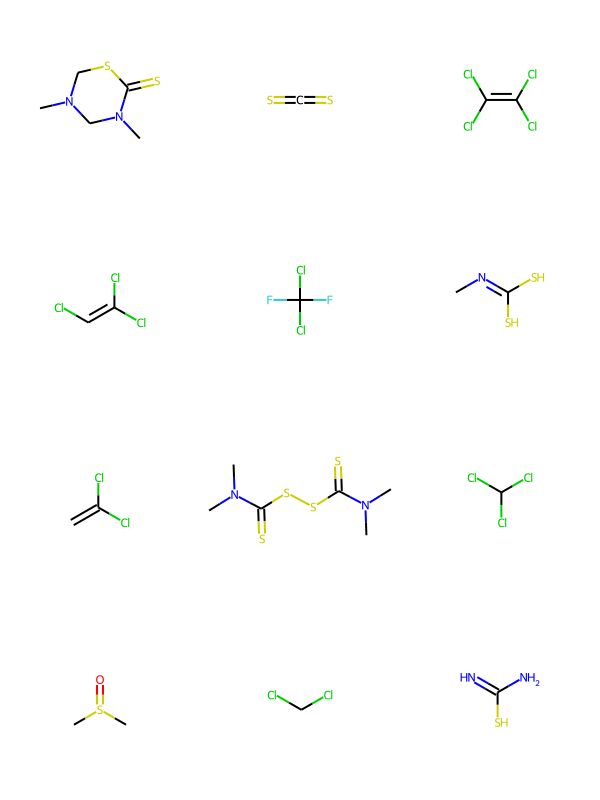

In [5]:
molz = db_conf[db_conf[[f"FQD_{i}" for i in range(2,10)]].isna().all(axis=1)]["mol"]
Chem.Draw.MolsToGridImage(molz)

In [6]:
with open("no_substructures_smiles", "w") as f:
    f.write("\n".join(db_conf[db_conf[[f"FQD_{i}" for i in range(2,10)]].isna().all(axis=1)]["smiles"]))

In [ ]:
grid = Chem.Draw.MolsToGridImage(molz, useSVG=True)
with open('grid.svg', 'w') as f:
    f.write(grid.data)

In [7]:
db_conf[db_conf[[f"FQD_{i}" for i in range(2,10)]].isna()]

,db_idx,smiles,Experimental logarithmic BCF,Experimental BCF class,FQD_2,FQD_3,FQD_4,FQD_5,FQD_6,FQD_7,FQD_8,FQD_9,mol
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
db_conf[[f"FQD_{i}" for i in range(2,10)]].isna().any(axis=1).value_counts()

True     549
False    319
dtype: int64

In [13]:
db_conf[[f"FQD_{i}" for i in range(2,10)]].isna().sum(axis=1).value_counts().sort_index()

0    319
1     64
2    129
3    129
4     83
5     62
6     33
7     37
8     12
dtype: int64